In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from LandMPC.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 10.0 # simulation length in seconds
# x0 = [w(3), r(3), v(3), p(3)]
# r = [alpha, beta, gamma] (roll, pitch, yaw)
# p = [x, y, z]
# Start: x=3, y=2, z=10, roll=30 deg (gamma=30 deg)
x0 = np.array([0,0,0, 0,0,np.deg2rad(30), 0,0,0, 3,2,10]) 
# Target: x=1, y=0, z=3, roll=0 deg
x_ref = np.array([0,0,0, 0,0,0, 0,0,0, 1,0,3])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 2.0 # horizon time 
nmpc = NmpcCtrl(rocket, H, xs, us)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0 0 0 0 0 0 0 0 0 1 0 3]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
[NMPC OK] t= 0.00 |e_p|=7.550 |v|=0.000 e_roll=0.524 beta=0.000 u0=[-0.2617994   0.2617994  49.99999977  0.12979735]
[NMPC OK] t= 0.25 |e_p|=7.530 |v|=0.528 e_roll=0.566 beta=-0.145 u0=[ 0.26179939  0.26179939 49.99999969  2.41697845]
[NMPC OK] t= 0.50 |e_p|=7.239 |v|=3.016 e_roll=0.878 beta=-0.608 u0=[ 0.2617994  -0.2617994  79.99999997  3.67045855]
[NMPC OK] t= 0.75 |e_p|=6.036 |v|=6.973 e_roll=0.142 beta=-0.889 u0=[ 0.20437419 -0.26179938 50.00000363  3.16286019]
Simulating time 1.00
[NMPC OK] t= 1.00 |e_p|=4.392 |v|=6.861 e_roll=-0.290 beta=0.103 u0=[-0.22870876  0.19393383 80.00000043  1.45529943]
[NMPC OK] t= 1.25 |e_p|=2.993 |v|=5.527 e_roll=-0.251 beta=0.303 u0=[-1.15999069e-03  2.88493248e-02  8.00000004e+01  1.49574414e-01]
[NMPC OK] t= 1.50 |e_p|=1.856 |v|=4.396 e_roll=-0.220 beta=0.235 u0=[ 8.64924243e-03  4.30841277e-04  8.00000004e+01 -7.58020506e-01]
[NMPC OK] t= 1.75 |e_p|=0.990 |v|=3.381 e_roll=-0.174 beta=0.157 u0=[ 5.31582148e-03 -1.85755146e-03 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

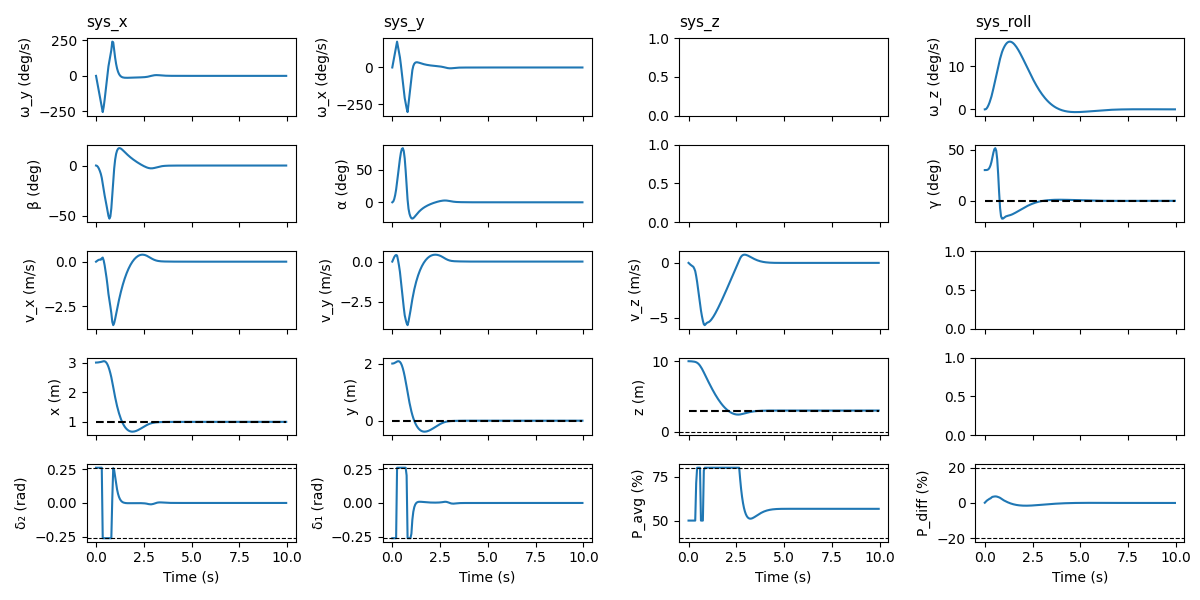

 JS Error => error: Uncaught SyntaxError: Missing initializer in const declaration


In [5]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)